In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
sess = tf.InteractiveSession()
mnist  =  input_data.read_data_sets('MNIST_data/', one_hot = True)

print( mnist.train)

/usr/local/lib/python2.7/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


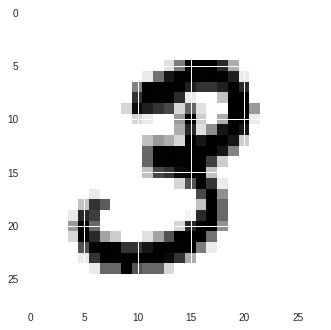

In [5]:
def display_sample(num):
    print(mnist.train.labels[num])
    label = mnist.train.labels[num].argmax(axis = 0)
    image = mnist.train.images[num].reshape([28,28])
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    
    
    
display_sample(1)


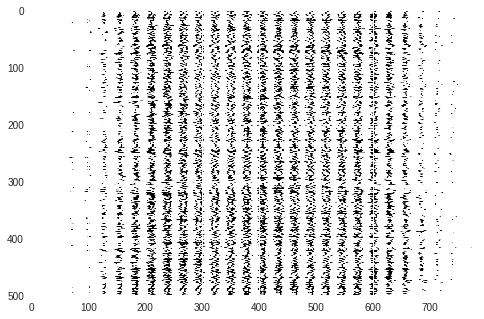

In [12]:
images = mnist.train.images[0].reshape([1,784])

for i in range(1,500):
       images = np.concatenate((images, mnist.train.images[i].reshape([1, 784])))
    
plt.imshow(images, cmap =  plt.get_cmap('gray_r'))
plt.show()

In [0]:
input_images = tf.placeholder(tf.float32, shape = [None, 784])
target_labels = tf.placeholder(tf.float32, shape = [None, 10])

In [0]:
hidden_nodes = 512
input_weights  = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weight = tf.Variable(tf.truncated_normal([512, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [0]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weight)+hidden_biases

In [0]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = digit_weights, labels = target_labels))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(.3).minimize(loss_function)

In [0]:
correct_prediction = tf.equal(tf.argmax(digit_weights, 1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [119]:
tf.global_variables_initializer().run()

for x in range(3000):
    batch = mnist.train.next_batch(50)
    optimizer.run(feed_dict = {input_images: batch[0], target_labels : batch[1]})
    if ( (x+1)%100 == 0 ):
      print('Training epoch' + str(x+1))
      print("accuracy" + str(accuracy.eval(feed_dict = {input_images : mnist.test.images, target_labels : mnist.test.labels})))

Training epoch100
accuracy0.8696
Training epoch200
accuracy0.8858
Training epoch300
accuracy0.8904
Training epoch400
accuracy0.9073
Training epoch500
accuracy0.916
Training epoch600
accuracy0.9152
Training epoch700
accuracy0.9161
Training epoch800
accuracy0.9271
Training epoch900
accuracy0.9229
Training epoch1000
accuracy0.9198
Training epoch1100
accuracy0.9281
Training epoch1200
accuracy0.9263
Training epoch1300
accuracy0.9274
Training epoch1400
accuracy0.9298
Training epoch1500
accuracy0.9345
Training epoch1600
accuracy0.9365
Training epoch1700
accuracy0.9301
Training epoch1800
accuracy0.9332
Training epoch1900
accuracy0.9381
Training epoch2000
accuracy0.934
Training epoch2100
accuracy0.9351
Training epoch2200
accuracy0.9356
Training epoch2300
accuracy0.9354
Training epoch2400
accuracy0.94
Training epoch2500
accuracy0.938
Training epoch2600
accuracy0.9411
Training epoch2700
accuracy0.9412
Training epoch2800
accuracy0.9402
Training epoch2900
accuracy0.9379
Training epoch3000
accuracy0

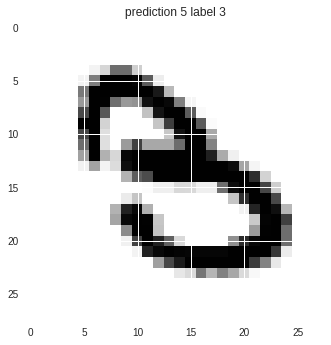

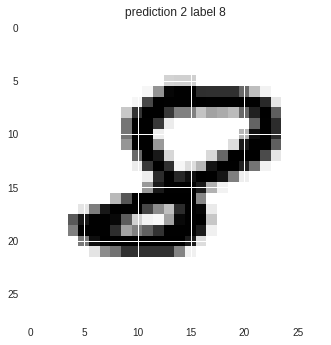

In [120]:
for x in range(100):
  x_train = mnist.test.images[x,:].reshape(1,784)
  y_train = mnist.test.labels[x,:]
  
  label = y_train.argmax()
  prediction = sess.run(digit_weights, feed_dict = {input_images: x_train}).argmax()
  
  if (prediction != label):
    plt.title('prediction %s label %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap = plt.get_cmap('gray_r'))
    plt.show()